# Выявление критериев успешности игры.

Целью данного исселедования является выявление закономерностей, которые определят успешность компьютерной игры на рынке. Проанализируем исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, определим актуальный период активной игромании и продаж, составим приблизительный портрет потенциального покупателя и выявим различия в интересах игроков разных регионов. Сформулируем выводы и "рецепт успеха" на основе полученных результатов.

## Содержание
1. [Изучение данных.](#paragraph1)
2. [Подготовка данных.](#paragraph2)
3. [Исследовательский анализ данных.](#paragraph3)
4. [Портрет пользователя каждого региона.](#paragraph4)
5. [Проверка гипотез.](#paragraph5)
6. [Общий вывод.](#paragraph6)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
import math

In [3]:
warnings.filterwarnings("ignore")

## Изучение данных. <a name="paragraph1"></a>

In [4]:
try:
    df = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    df = pd.read_csv('games.csv')

In [5]:
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12985,Choujikuu Yousai Macross: Do You Remember Love,PS3,2012.0,Shooter,0.00,0.00,0.05,0.00,NaN,NaN,NaN
4837,Star Wars: Clone Wars,GC,2002.0,Shooter,0.31,0.08,0.00,0.01,NaN,NaN,NaN
267,Batman: Arkham Asylum,PS3,2009.0,Action,2.24,1.31,0.07,0.61,91.0,8.9,T
2780,NBA 2K16,PS3,2015.0,Sports,0.45,0.12,0.03,0.13,NaN,4.6,E
2892,South Park,PS,1998.0,Shooter,0.39,0.27,0.00,0.05,NaN,NaN,NaN
5784,Midway Arcade Treasures 2,XB,2004.0,Misc,0.24,0.05,0.00,0.01,74.0,7.4,M
1493,TNN Motor Sports Hardcore 4x4,PS,1996.0,Racing,0.73,0.50,0.00,0.09,NaN,NaN,NaN
14169,The Night of the Rabbit,PC,2013.0,Adventure,0.00,0.03,0.00,0.00,75.0,7.5,NaN
12230,Worms 3D,GC,2003.0,Strategy,0.05,0.01,0.00,0.00,69.0,7.6,T
7476,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,0.15,0.05,0.00,0.00,NaN,NaN,NaN


## Подготовка данных. <a name="paragraph2"></a>

### Приведение названий колонок к нижнему регистру.

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Приведение типов данных.

Преобразуем тип в year_of_release в int. Поскольку данные столбцы содержат пустые значения, заменим типы данных на Int64, позволить изменить тип на целочисленный и сохранить наны.

In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


###  Обработка пропусков.

Заменим пустые значение в year_of_release по совпадению имен игр.

In [9]:
names_years = df.groupby('name')['year_of_release'].max()

In [10]:
df = df.join(names_years, on='name', rsuffix='_x')
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release_x'])
df['year_of_release'].isna().sum()

146

Посмотрим на оставшиеся пустые.

In [11]:
df[df['year_of_release'].isna()].sort_values(by = 'critic_score', ascending = False).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_x
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,<NA>
1142,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T,<NA>
1984,Legacy of Kain: Soul Reaver,PS,<NA>,Action,0.58,0.40,0.00,0.07,91.0,9,T,<NA>
4294,The Chronicles of Riddick: Escape from Butcher...,XB,<NA>,Shooter,0.32,0.11,0.00,0.02,89.0,8.9,M,<NA>
3289,Advance Wars: Days of Ruin,DS,<NA>,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+,<NA>
16277,Homeworld Remastered Collection,PC,<NA>,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,<NA>
2108,Suikoden III,PS2,<NA>,Role-Playing,0.29,0.23,0.38,0.08,86.0,7.7,T,<NA>
6133,Unreal Championship 2: The Liandri Conflict,XB,<NA>,Shooter,0.22,0.05,0.00,0.01,85.0,8.2,M,<NA>
11119,Super Puzzle Fighter II,GBA,<NA>,Puzzle,0.06,0.02,0.00,0.00,83.0,9.5,E,<NA>
8250,Trauma Team,Wii,<NA>,Simulation,0.14,0.00,0.02,0.01,82.0,8.8,T,<NA>


Отфильтровали по продажам в Северной Америке. Была идея заполнить пустые года в случае, если год указан в названии игры, но у самых продаваемых этого года нет, кроме одной. Ее заполним, остальные вынуждены оставить. 

In [12]:
df.loc[df['name'] == "wwe Smackdown vs. Raw 2006", 'year_of_release'] = 2006

In [13]:
df['year_of_release'].isna().sum()

145

Обработаем рейтинг tbd.
tbd - To Be Determined (или "Будет определено") значит, что рейтинг еще не сформирован. Этот рейтинг некорректно заменять на 0, потому что в данном стобце именно числа служат показателем высокого или низкого рейтинга, и ноль будет одначать очень низкий рейтинг. Это приведет к проблемам в дальнейшем исследовании. Уже сейчас можно предположить, что рейтинг играет далеко не последнюю роль в успешности игры. И нам необходимо произвести замену так, чтобы игры с tbd не превратились в аутсайдеров, если таковыми доподлинно не являются.  Заменим tbd на Nan.

In [14]:
df['user_score'].isna().sum()

6701

In [15]:
df.loc[df['user_score'] == "tbd", 'user_score'] = np.nan
df['user_score'].isna().sum()

9125

Приведем типы данных в user_score к float.

In [16]:
df['user_score'] = df['user_score'].astype(float)

Обработаем пустые значения в столбце 'rating'.

In [17]:
df['rating'] = df['rating'].fillna('Unknown')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16713 non-null  object 
 1   platform           16715 non-null  object 
 2   year_of_release    16570 non-null  Int64  
 3   genre              16713 non-null  object 
 4   na_sales           16715 non-null  float64
 5   eu_sales           16715 non-null  float64
 6   jp_sales           16715 non-null  float64
 7   other_sales        16715 non-null  float64
 8   critic_score       8137 non-null   float64
 9   user_score         7590 non-null   float64
 10  rating             16715 non-null  object 
 11  year_of_release_x  16567 non-null  Int64  
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB


На этом завершаем обработку пропусков. Более ничего из предложенных данных вытащить не представляю возможным.

Подсчитаем суммарые продажи.

In [19]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Исследовательский анализ данных. <a name="paragraph3"></a>

#### Сколько игр выпускалось в разные годы.

In [20]:
df.groupby(by = 'year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     339
2000     350
2001     484
2002     845
2003     785
2004     765
2005     947
2006    1021
2007    1202
2008    1440
2009    1431
2010    1271
2011    1153
2012     662
2013     547
2014     582
2015     606
2016     502
Name: name, dtype: int64

Определенно данные за все годы не нужны, потому что современные компьютеры и консоли появились намного позже, чем 1980 или 1990 годы, которые фигурируют в данных. В 2016 году популярны и широко используются совсем другие технологии и именно по ним нужно вести оценку.

#### Как с годами менялись продажи по платформам.

In [21]:
df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


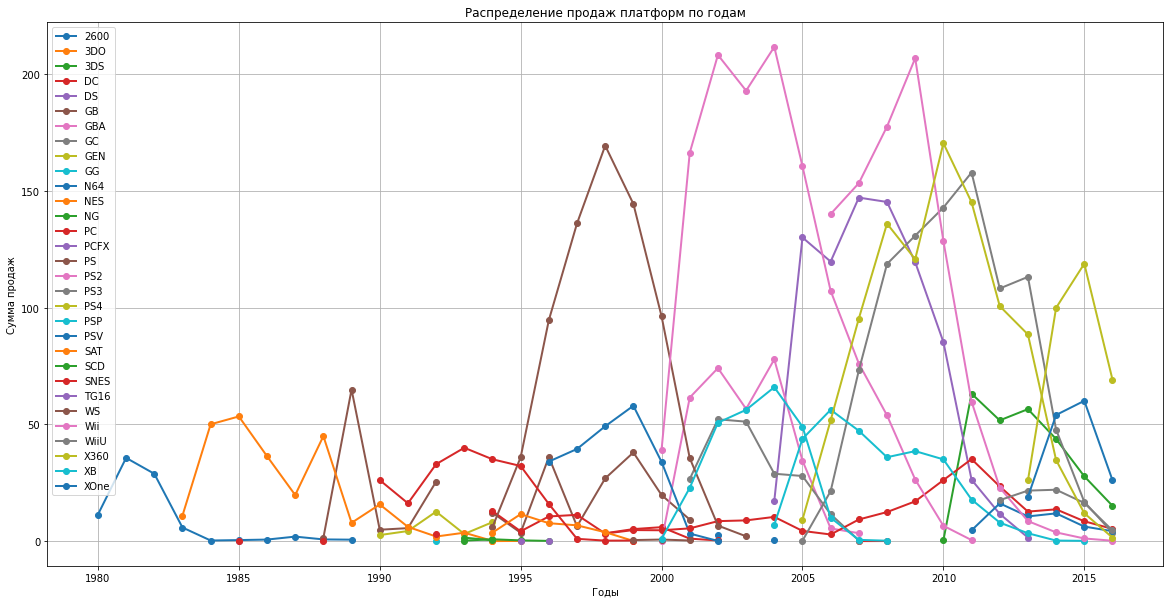

In [22]:
df.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(linewidth = 2, marker = 'o', figsize=(20, 10), grid=True)
plt.legend(loc='upper left')
plt.ylabel('Сумма продаж')
plt.xlabel('Годы')
plt.title('Распределение продаж платформ по годам')
plt.show()

На графике популярности платформ хорошо видно, как разные консоли для игр появляются, выходят на пик популярности и угасают. Живут они около пяти лет, но конечно есть и исключения. 
Для того, чтобы результаты анализа были актуальны для будущего года, необходимо взять только современные платформы, которые в данный момент на пике популярности. Старые уже давно не используются, нет смысла брать их в расчет.

**Актуальным периодом будет 2011-2016 годы.** На графике видно, как примерно в этот период начали угасать одни и набирать популярность другие платформы.

#### Анализ актуального периода.

Выделим отдельный датафрейм. Построим график.

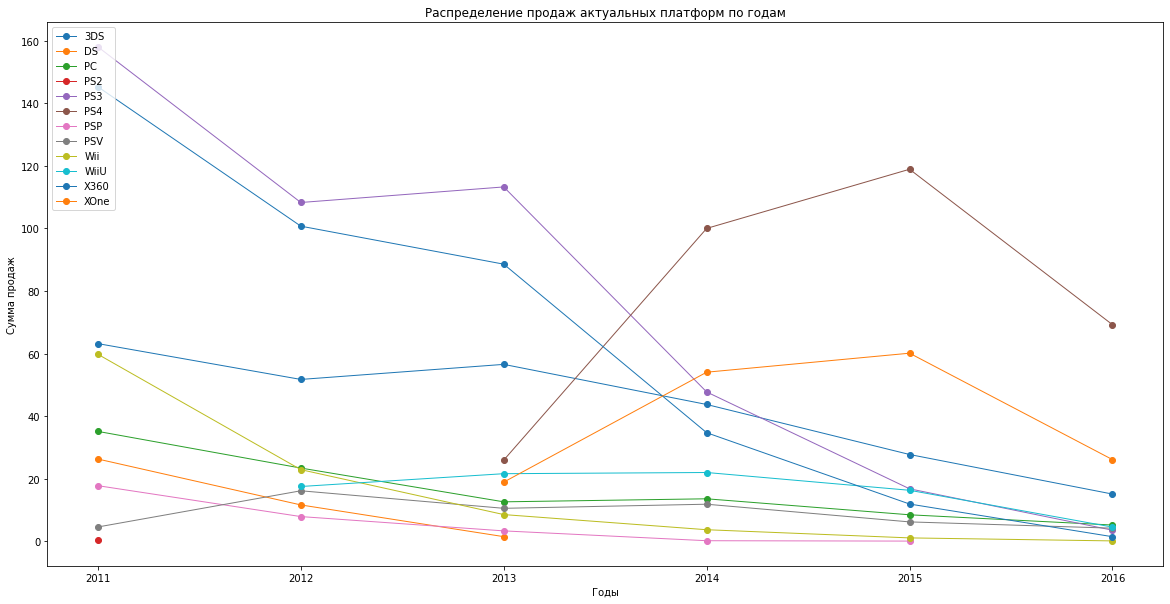

In [23]:
df_actual = df[df['year_of_release'] >= 2011]
df_actual.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(linewidth = 1, marker = 'o', figsize=(20, 10))
plt.legend(loc='upper left')
plt.ylabel('Сумма продаж')
plt.xlabel('Годы')
plt.title('Распределение продаж актуальных платформ по годам')
plt.show()

#### Определим лидеров продаж в актуальном периоде.

In [24]:
df_actual_pivot = df_actual.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').T

In [25]:
df_actual_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 3DS to XOne
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2011    9 non-null      float64
 1   2012    9 non-null      float64
 2   2013    11 non-null     float64
 3   2014    10 non-null     float64
 4   2015    10 non-null     float64
 5   2016    9 non-null      float64
dtypes: float64(6)
memory usage: 672.0+ bytes


In [26]:
df_actual_pivot.columns = [2011, 2012, 2013, 2014, 2015, 2016]

In [27]:
df_actual_pivot = df_actual_pivot.fillna(0)

In [28]:
df_actual_pivot['total_sales'] = 0
for element in range(2011, 2016):
    df_actual_pivot['total_sales'] += df_actual_pivot[element]

In [29]:
df_actual_pivot.sort_values(by='total_sales', ascending=False)

,2011,2012,2013,2014,2015,2016,total_sales
platform,,,,,,,
PS3,157.98,108.28,113.25,47.76,16.82,3.60,444.09
X360,145.23,100.72,88.58,34.74,11.96,1.52,381.23
PS4,0.00,0.00,25.99,100.00,118.90,69.25,244.89
3DS,63.20,51.76,56.57,43.76,27.78,15.14,243.07
XOne,0.00,0.00,18.96,54.07,60.14,26.15,133.17
Wii,59.79,22.94,8.59,3.75,1.14,0.18,96.21
PC,35.16,23.45,12.66,13.63,8.52,5.25,93.42
WiiU,0.00,17.56,21.65,22.03,16.35,4.60,77.59
PSV,4.63,16.19,10.59,11.90,6.25,4.25,49.56


По сумме продаж в актуальном периоде лидируют PS3, X360, PS4, 3DS, XOne. При этом PS3, X360 угасают, вышли на плато 3DS, WiiU, а набирают популярность PS4, XOne.

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

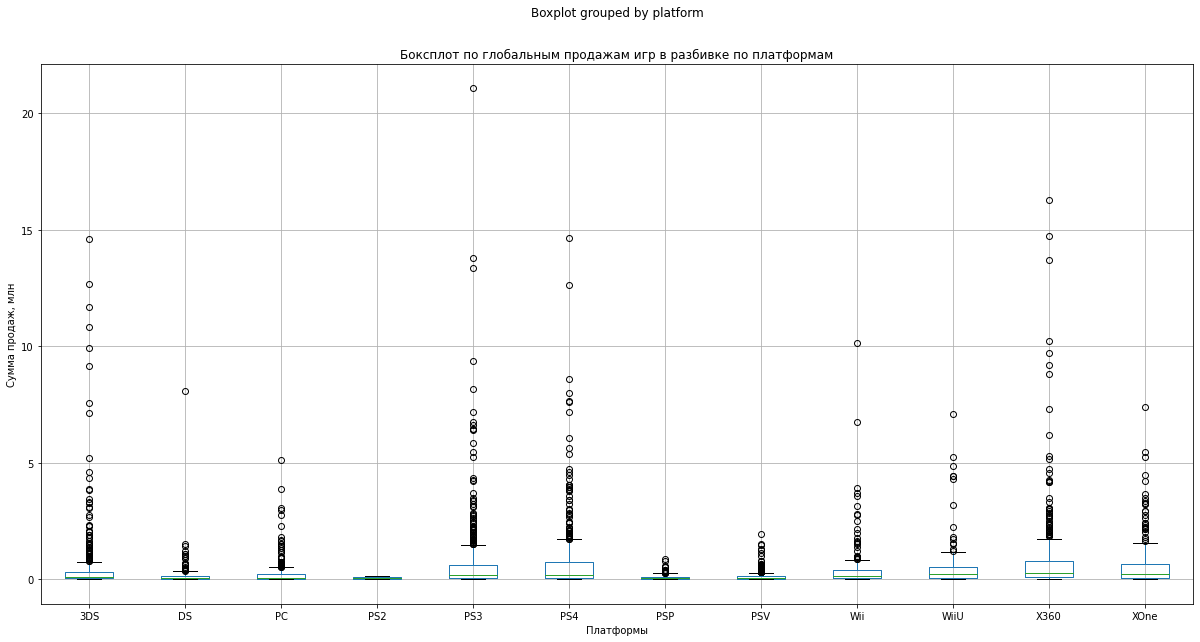

In [30]:
df_actual.boxplot('total_sales', by='platform', figsize=(20, 10))
plt.ylabel('Сумма продаж, млн')
plt.xlabel('Платформы')
plt.title('Боксплот по глобальным продажам игр в разбивке по платформам')
plt.show()

Выбросы на графиках показывают, что какие-то игры на каждой платформе выбиваются по продажам из среднестатистических значений. Очевидным лидером является PS3. На этой платформе выбросов очень много, а также есть один очень заметный "чемпион", обогнавший все игры на всех платформах.
3DS тоже имеет много выбросов, но показатели медианы и сам ящик у этой платформы ниже других лидеров, значит среднестатистические цены на игры на этой платформе ниже других. Такие же низкие цены видим у PSP, PSV.

PS4 как преемник PS3 набирает популярность по сравнению со старшим братом. Медианное значение у нее выше чем у PS4, свои выбросы тоже имеются.
Также стоит отметить X360, чьи показатели близки к PS4. У них похожие значения медиан и выбросов в целом. Возможно, эти платформы очень близки друг другу по популярности.

### Влияние рейтинга на популярность.

Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Рассмотрим на примере PS3.

In [31]:
df_actual_PS3 = df_actual[df_actual['platform'] == "PS3"]

Коэффициент корреляции 0.014


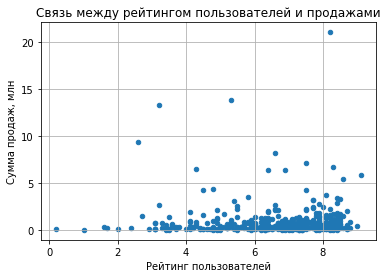

In [32]:
df_actual_PS3.plot(y='total_sales', x='user_score', kind='scatter', grid=True)
plt.xlabel('Рейтинг пользователей'),
plt.ylabel('Сумма продаж, млн')
plt.title('Связь между рейтингом пользователей и продажами')
print('Коэффициент корреляции', '{:.2}'.format(df_actual_PS3['total_sales'].corr(df_actual_PS3['user_score'])))

Коэффициент корреляции 0.38


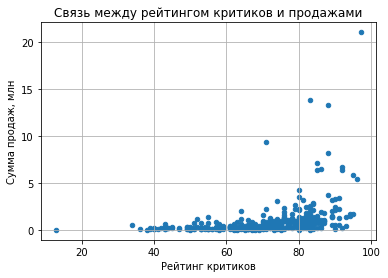

In [33]:
df_actual_PS3.plot(y='total_sales', x='critic_score', kind='scatter', grid=True)
plt.xlabel('Рейтинг критиков'),
plt.ylabel('Сумма продаж, млн')
plt.title('Связь между рейтингом критиков и продажами')
print('Коэффициент корреляции', '{:.2}'.format(df_actual_PS3['total_sales'].corr(df_actual_PS3['critic_score'])))

На платформе PS3 по графикам корреляций делаем вывод, что пользователи практически не влияют на продажи. Коэффициент оставляет всего 0,014. Продаваемыми могут быть игры как с низким рейтингом, так и с высоким.
Это связано с тем, что пользователей игр огромное количество, их мнения разрознены, поэтому картина рейтингов сильно смазана.

Рейтинг же критиков имеет некоторое влияние. Коэфф. корреляции составляет 0,38. Судя по всему, перед покупкой, пользователи чаще обращаются к профессиональной оценке и делают выбор в зависимоти от мнения критиков, нежели от мнения таких же пользователей.

Проверим, так ли складываются ситуации влияния у других популярных платформ. Возьмем X360.

Коэффициент корреляции 0.039


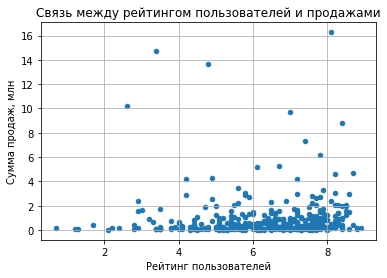

In [34]:
df_actual_X360 = df_actual[df_actual['platform'] == "X360"]
df_actual_X360.plot(y='total_sales', x='user_score', kind='scatter', grid=True)
plt.xlabel('Рейтинг пользователей'),
plt.ylabel('Сумма продаж, млн')
plt.title('Связь между рейтингом пользователей и продажами')
print('Коэффициент корреляции', '{:.2}'.format(df_actual_X360['total_sales'].corr(df_actual_X360['user_score'])))

Коэффициент корреляции 0.39


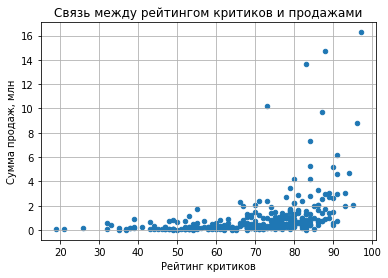

In [35]:
df_actual_X360.plot(y='total_sales', x='critic_score', kind='scatter', grid=True)
plt.xlabel('Рейтинг критиков'),
plt.ylabel('Сумма продаж, млн')
plt.title('Связь между рейтингом критиков и продажами')
print('Коэффициент корреляции', '{:.2}'.format(df_actual_X360['total_sales'].corr(df_actual_X360['critic_score'])))

Та же картина.

Возьмем XOne.

Коэффициент корреляции -0.069
Коэффициент корреляции 0.42


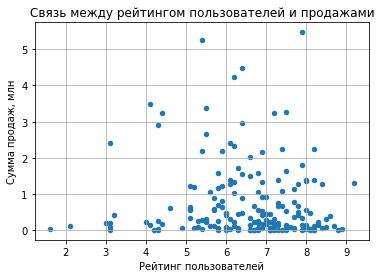

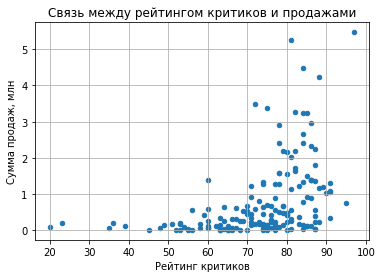

In [36]:
df_actual_XOne = df_actual[df_actual['platform'] == "XOne"]
df_actual_XOne.plot(y='total_sales', x='user_score', kind='scatter', grid=True)
plt.xlabel('Рейтинг пользователей'),
plt.ylabel('Сумма продаж, млн')
plt.title('Связь между рейтингом пользователей и продажами')
print('Коэффициент корреляции', '{:.2}'.format(df_actual_XOne['total_sales'].corr(df_actual_XOne['user_score'])))

df_actual_XOne.plot(y='total_sales', x='critic_score', kind='scatter', grid=True)
plt.xlabel('Рейтинг критиков'),
plt.ylabel('Сумма продаж, млн')
plt.title('Связь между рейтингом критиков и продажами')
print('Коэффициент корреляции', '{:.2}'.format(df_actual_XOne['total_sales'].corr(df_actual_XOne['critic_score'])))

PS4.

Коэффициент корреляции -0.032
Коэффициент корреляции 0.41


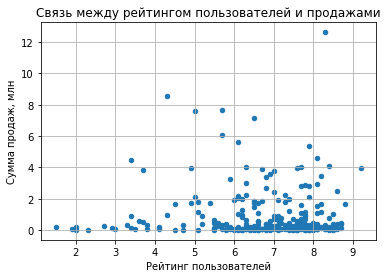

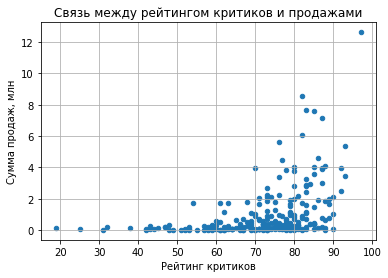

In [37]:
df_actual_PS4 = df_actual[df_actual['platform'] == "PS4"]
df_actual_PS4.plot(y='total_sales', x='user_score', kind='scatter', grid=True)
plt.xlabel('Рейтинг пользователей'),
plt.ylabel('Сумма продаж, млн')
plt.title('Связь между рейтингом пользователей и продажами')
print('Коэффициент корреляции', '{:.2}'.format(df_actual_PS4['total_sales'].corr(df_actual_PS4['user_score'])))

df_actual_PS4.plot(y='total_sales', x='critic_score', kind='scatter', grid=True)
plt.xlabel('Рейтинг критиков'),
plt.ylabel('Сумма продаж, млн')
plt.title('Связь между рейтингом критиков и продажами')
print('Коэффициент корреляции', '{:.2}'.format(df_actual_PS4['total_sales'].corr(df_actual_PS4['critic_score'])))

#### Вывод.

Исходя из рассмотренных корреляций, можно сделать вывод, что рейтинг пользоватей крайне ненадежный показатель популярности игр. На разных платформах коэфф. корреляции скачет, меняется и в целом имеет низкое значение, либо вообще отрицательное. Рейтинг критиков имеет куда большее стабильное влияние.

### Распределение игр по жанрам.

In [38]:
df_actual['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Racing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [40]:
genres = ['Action', 'Shooter', 'Role-Playing', 'Racing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Adventure', 'Puzzle',
       'Strategy']

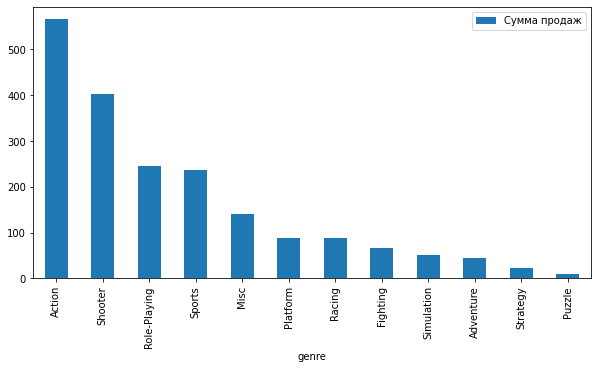

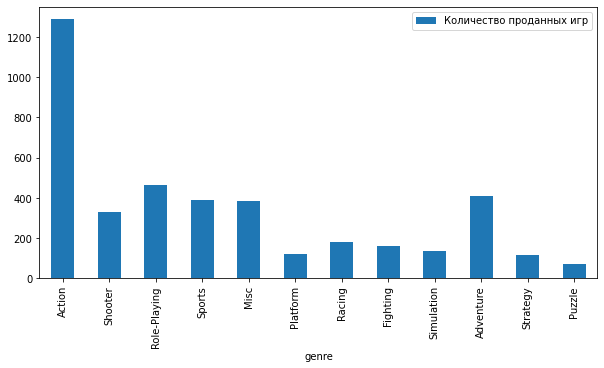

In [41]:
df_actual_genres = df_actual.pivot_table(index='genre', values='total_sales', aggfunc=['count','sum']).sort_values(by = ('sum', 'total_sales'), ascending=False)
#df_actual_genres.columns = ['count', 'sum']
df_actual_genres.plot(kind='bar', y=('sum', 'total_sales'), label='Сумма продаж', stacked=True, figsize=(10, 5))

df_actual_genres.plot(kind='bar', y=('count', 'total_sales'), label='Количество проданных игр', stacked=True, figsize=(10, 5))

plt.show()

In [42]:
df_actual_genres['one_game'] = df_actual_genres[('sum', 'total_sales')] / df_actual_genres[('count', 'total_sales')]
df_actual_genres

,count,sum,one_game
,total_sales,total_sales,
genre,,,
Action,1287,565.22,0.439176
Shooter,332,402.96,1.213735
Role-Playing,465,245.63,0.528237
Sports,390,237.40,0.608718
Misc,382,139.91,0.366257
Platform,122,88.68,0.726885
Racing,180,88.31,0.490611
Fighting,159,66.90,0.420755


#### Вывод.

Самый прибыльный жанр в актуальном периоде - это жанр Экшен игр, он бесспорно лидирует и по количеству продаж, и по сумме, это видно как на графике, так и на сводной таблице. 

Далее идет жанр Shooter. За последние годы он приносил большую прибыль при сравнительно небольшом количестве игр. Так в сравнении с Role-Playing, количество проданных игр у Shooter ниже, но сумма выручки больше. Это опеределенно перспективный жанр.
На Sports тоже стоит обратить внимание, это четвертый самый продаваемый жанр.

Аутсайдерами рынка оказались Puzzle, Strategy, Adventure. Причем интересно то, что количество продаж в жанре Adventure огромно, но доходы крайне малы. Определенно стоит обратить внимание на этот перспективный жанр. Видно, что спрос на него есть и нужно рассмотреть вариант с повышением цен на игры этого жанра, чтобы получать большую выручку.


## Портрет пользователя каждого региона.  <a name="paragraph4"></a>

### Самые популярные платформы по регионах и их доли в продажах.
Взглянем на графики.

,platform,na_sales
0,3DS,82.83
1,PS3,168.96
2,PS4,108.74
3,X360,228.18
4,XOne,93.12
5,Оther,151.76


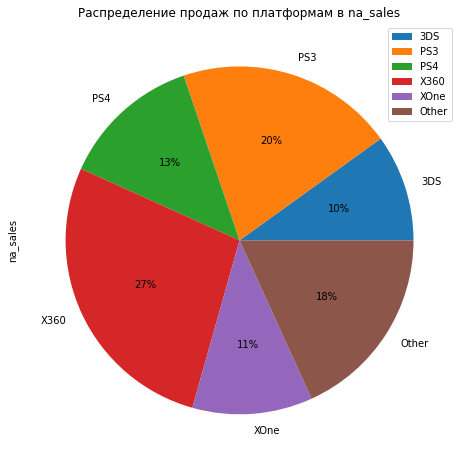

,platform,eu_sales
0,3DS,61.46
1,PC,57.38
2,PS3,164.15
3,PS4,141.09
4,X360,117.87
5,Оther,131.33


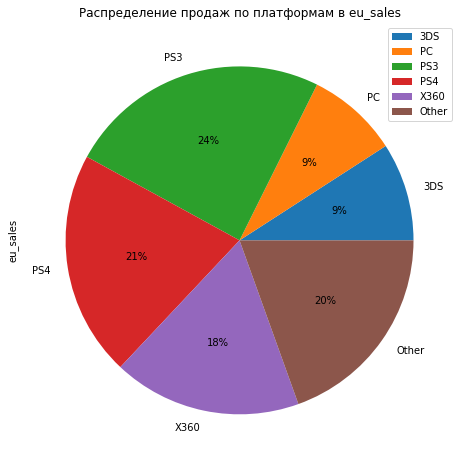

,platform,jp_sales
0,3DS,100.62
1,PS3,49.40
2,PS4,15.96
3,PSP,24.28
4,PSV,21.84
5,Оther,33.81


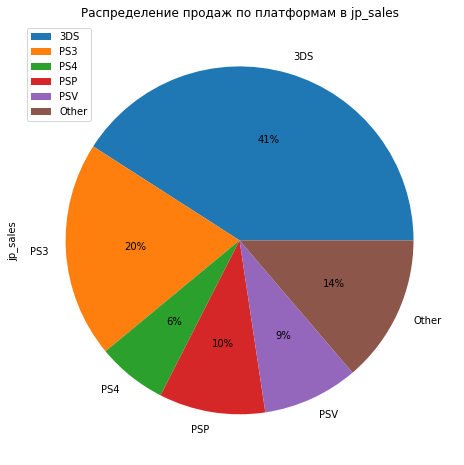

In [43]:
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    
    region_platform = df_actual.pivot_table(index = 'platform', values = region_sales, aggfunc='sum').sort_values(by = region_sales, ascending=False).reset_index()
    region_platform.loc[region_platform.index > 4, 'platform'] = 'Оther'
    region_platform_top5 = region_platform.groupby(by='platform').sum().reset_index()
    display(region_platform_top5)
    region_platform_top5.plot(y = region_sales, kind='pie', labels= region_platform_top5['platform'], figsize=(8, 8), autopct='%1.f%%')
    plt.title('Распределение продаж по платформам в {}'.format(region_sales))
    plt.show()

**Самые популярные платформы игр в регионе NA (Северная Америка).** Это X360 - доля рынка 27%. После нее идут братья PS3, PS4 с долями 20% и 13%. Замыкают пятерку 3DS и XOne c с почти одинаковыми продажами - по 10%.

**Самые популярные платформы игр в регионе EU (Европа).** Тут в лидерах братья PS3, PS4 24% и 21 % соответственно, замыкает тройку X360 - доля рынка 18%, чертвертая и пятая платформа по Европе это 3DS и PC - по 9%.

**Самые популярные платформы игр в регионе JP (Япония).** Вот здесь самое интересное. Если по Америке и Европе результаты почти схожи - в первой пятерке 4 из 5 платформ совпадают, то в Японии совсем другая картина. Бесспорным лидером тут является 3DS с коллосальной долей в 41%, за ним PS3 c 20%, далее PSP и PSV. И последней идет PS4.

Если мы поподробнее ознакомимся с платформами, то выявим особенность популярности 3DS, PSP и PSV в Японии. Это портативные консоли. Те, которые можно взять с собой и играть где угодно. То есть игровой рынок Северной Америки и Европы больше сосредоточен на домашних приставках, а в Японии стоит делать упор на портативность. Это обязательно нужно учесть.

### Самые популярные жанры по регионам.

,genre,na_sales
0,Action,234.41
1,Misc,69.81
2,Role-Playing,83.78
3,Shooter,194.45
4,Sports,108.70
5,Оther,142.44


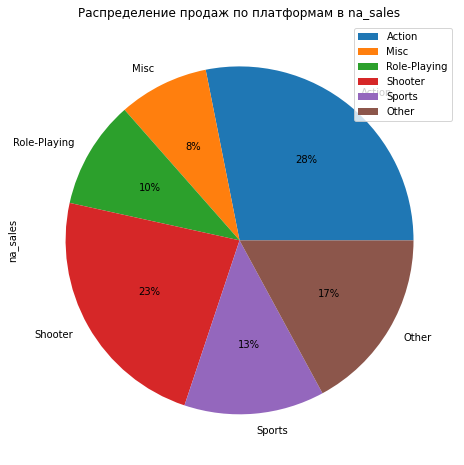

,genre,eu_sales
0,Action,202.17
1,Racing,40.58
2,Role-Playing,62.30
3,Shooter,148.05
4,Sports,88.67
5,Оther,131.51


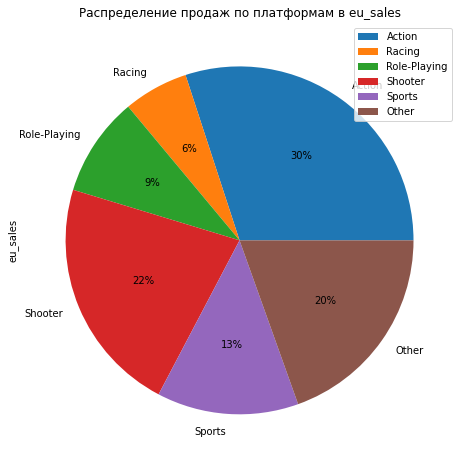

,genre,jp_sales
0,Action,63.63
1,Fighting,12.38
2,Misc,17.85
3,Platform,12.13
4,Role-Playing,79.87
5,Оther,60.05


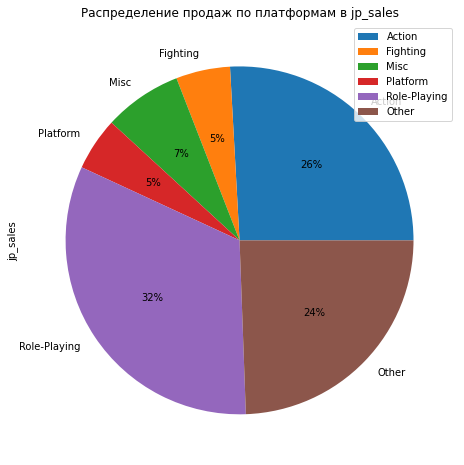

In [44]:
for region_genres in ['na_sales', 'eu_sales', 'jp_sales']:
    
    region_genres_sales = df_actual.pivot_table(index = 'genre', values = region_genres, aggfunc='sum').sort_values(by = region_genres, ascending=False).reset_index()
    region_genres_sales.loc[region_genres_sales.index > 4, 'genre'] = 'Оther'
    region_genres_sales_top5 = region_genres_sales.groupby(by='genre').sum().reset_index()
    display(region_genres_sales_top5)
    region_genres_sales_top5.plot(y = region_genres, kind='pie', labels= region_genres_sales_top5['genre'], figsize=(8, 8), autopct='%1.f%%')
    plt.title('Распределение продаж по платформам в {}'.format(region_genres))
    plt.show()

**В Северной Америке и Европе** очень похожие распределения популярных жанров. На первом месте Экшн игры, далее Стрелялки (Shooter), далее Sports, Role-Playing и только пятое место в рейтинге отличается: в Европе это Racing, в СА это Misc (разное).

**Япония** снова сильно выделяется на их фоне. Тут лидером является  Role-Playing, второе место у Action, 3 последних с небольшими долями у Misc, Fighting, Platform.



### Влияние рейтинга ESRB на продажи в отдельном регионе.

,rating,na_sales
0,M,309.32
1,E,170.25
2,Unknown,124.03
3,E10+,119.95
4,T,109.62
5,EC,0.42
6,RP,0.00


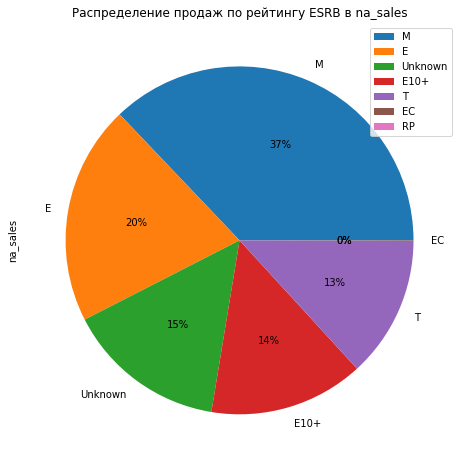

,rating,eu_sales
0,M,251.40
1,E,141.93
2,Unknown,116.67
3,T,83.37
4,E10+,79.88
5,RP,0.03
6,EC,0.00


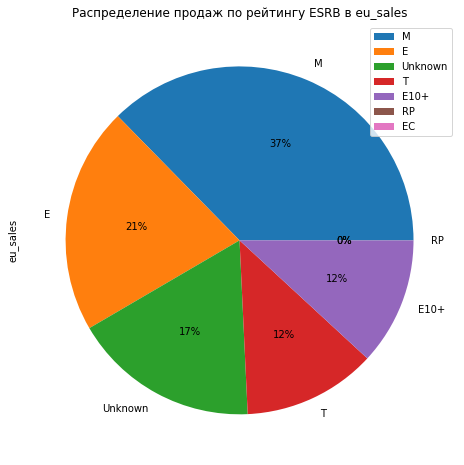

,rating,jp_sales
0,Unknown,138.46
1,E,36.68
2,T,33.39
3,M,26.15
4,E10+,11.23
5,EC,0.00
6,RP,0.00


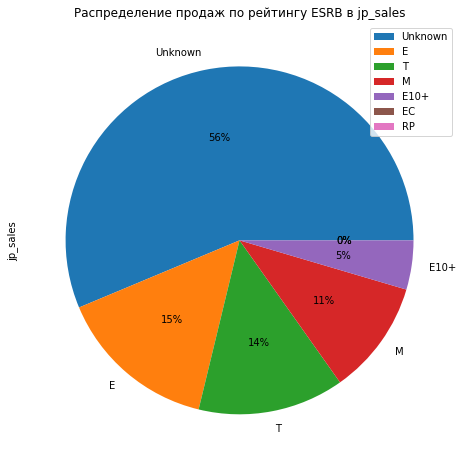

In [45]:
for region_rating in ['na_sales', 'eu_sales', 'jp_sales']:
    
    region_rating_sales = df_actual.pivot_table(index = 'rating', values = region_rating, aggfunc='sum').sort_values(by = region_rating, ascending=False).reset_index()
    display(region_rating_sales)
    region_rating_sales.plot(y = region_rating, kind='pie', labels= region_rating_sales['rating'], figsize=(8, 8), autopct='%1.f%%')
    plt.title('Распределение продаж по рейтингу ESRB в {}'.format(region_rating))
    plt.show()

In [46]:
ratio_meanings = pd.DataFrame(data = [
    ['E', 'Для всех'], 
    ['T', 'От 13 лет'], 
    ['M', 'От 17 лет'], 
    ['E10+', 'От 10 лет'], 
    ['EC', 'Для детей младшего возраста'], 
    ['RP', 'Рейтинг ожидается']], 
    columns = ['index', 'meaning'])
ratio_meanings 

,index,meaning
0,E,Для всех
1,T,От 13 лет
2,M,От 17 лет
3,E10+,От 10 лет
4,EC,Для детей младшего возраста
5,RP,Рейтинг ожидается


В **Европе и Северной Америке** практически совпадают доли продаж в зависимости от возрастного рейтинга. На первом месте игры для детей старше 17 лет (37% продаж), далее игры для всех (пятая часть продаж), далее неизвестный рейтинг, и последние два популярных рейтинга: от 13 лет и от 10 лет.

В **Японии** же распределение такое: на первом месте более половины продаж занимают игры с неизвестным рейтингом, примерно одинаковую долю имеют игры игры для всех и для детей от 13 лет (также почти около трети), далее от 17 лет, и старше 10 лет.

В Европе и Северной Америке - лучше всего продаются взрослые игры, на втором месте игры для всех. Но также и велик вес Неизвестного рейтинга. В Японии этот "неизвестный" занял большую часть рынка. 

Дело в том, что система рейтингования в наших данных - это американо-канадская система организации ESRB. Она неуниверсальна и присваивается не всем в мире играм, поэтому на входе было много пустых значений. 
Хорошо видно, что очень большая часть популярных игр в Японии не имеют рейтинга ESRB, поэтому сделать выводы о возрастных категориях пользователей этого региона очень сложно.

В будущем необходимо рассматривать рейтинги игр не только по одной системе ESRB, но также подтянуть из японской CERO и европейской PEGI, так данные будут более полными и информативными. 



## Проверка гипотез.  <a name="paragraph5"></a>

#### Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**H0** = средние пользовательские рейтинги платформ Xbox One и PC равны.

**H1** = средние пользовательские рейтинги платформ Xbox One и PC неравны.

In [47]:
avg_user_score_xone = df_actual.query('platform == "XOne"')['user_score'].mean()
avg_user_score_pc = df_actual.query('platform == "PC"')['user_score'].mean()
print('Средний пользовательский рейтинг платформы Xbox One', avg_user_score_xone)
print('Средний пользовательский рейтинг платформы PC', avg_user_score_pc)

Средний пользовательский рейтинг платформы Xbox One 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.46624203821656


Взглянем на дисперсии.

In [48]:
print(np.var(df_actual.query('platform == "XOne"')['user_score'], ddof=1))
print(np.var(df_actual.query('platform == "PC"')['user_score'], ddof=1))

1.9069968429360695
2.5759813597606884


Дисперсии далеки друг от друга, применим параметр equal_var = False

In [49]:
platform_results = st.ttest_ind(
    df_actual.query('platform == "XOne"')['user_score'],
    df_actual.query('platform == "PC"')['user_score'], equal_var = False, nan_policy="omit")
print('p-значение: ', platform_results.pvalue)

p-значение:  0.6865918069617839


In [50]:
alpha = .01 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
if (platform_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Данные из выборки не противоречат нулевой гипотезе. Это значит, что рассматриваемая нами выборка игр из актуального периода не противоречит предположению, что средние пользовательские рейтинги Xbox One и PC одинаковые.

#### Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

**H0** = средние пользовательские рейтинги жанров Action и Sports равны.

**H1** = средние пользовательские рейтинги жанров Action и Sports неравны.


In [51]:
avg_user_score_action = df_actual.query('genre == "Action"')['user_score'].mean()
avg_user_score_sports = df_actual.query('genre == "Sports"')['user_score'].mean()
print('Средний пользовательский рейтинг жанра Action', avg_user_score_action)
print('Средний пользовательский рейтинг жанра Sports', avg_user_score_sports)

Средний пользовательский рейтинг жанра Action 6.7838518518518525
Средний пользовательский рейтинг жанра Sports 5.650813008130081


Взглянем на дисперсии.

In [52]:
print(np.var(df_actual.query('genre == "Action"')['user_score'], ddof=1))
print(np.var(df_actual.query('genre == "Sports"')['user_score'], ddof=1))

1.8013857346961206
2.8825095404015264


In [53]:
genre_results = st.ttest_ind(
    df_actual.query('genre == "Action"')['user_score'],
    df_actual.query('genre == "Sports"')['user_score'], equal_var = False, nan_policy="omit")
print('p-значение: ', genre_results.pvalue)

alpha = .01
if (genre_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.428127575480951e-19
Отвергаем нулевую гипотезу


Данные из выборки отвергают нулевую гипотезу. Это значит, результат нашего исследования не противоречит предположению, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод.  <a name="paragraph6"></a>

Изначально нам представился большой набор данных за много лет. Было принято решение отсечь часть информации, выбрав **Актуальный период**. Для выявления критериев успешности игры важно было бы рассматривать только актальные игровые платформы и жанры. С годами изменились как технологии, так и вкусы людей. Поэтому неверно было бы сравнивать геймера из США 1990 года с геймером современным. 

График продаж игры на разных платформах по годам показал, что консоли в среднем существуют примерно 5 лет. Мы взяли за актуальный период эти самые 5 лет: с 2011 по 2016 годы. Далее работали только над данной выборкой.

Лидерами продаж в актуальном периоде стали PS3 и X360, но сейчас демострируют уже угасание. Стали набирать популярность PS4 и XOne, а также на плато вышли 3DS и WiiU. Боксплоты продемонстрировали выбросы, но что еще интереснее -  разницу медиан между разными консолями. Оказалось, что несмотря на высокие продажи,  медианы платформ могут сильно различаться. Уже здесь закралась идея некотором фундаментальном различии цен. 

Оценив влияние пользовательского мнения и мнения критиков, пришли к выводу, что продажи отчасти зависят только от мнения профи. Стоит обязательно учитывать критерий **"Мнение критиков"**.

Самый прибыльный жанр в актуальном периоде - это жанр **Экшен** игр, он бесспорно лидирует и по количеству продаж, и по сумме. Далее идет жанр **Shooter**. За последние годы он приносил большую прибыль при сравнительно небольшом количестве игр. Это опеределенно перспективный жанр.
На Sports тоже стоит обратить внимание, это четвертый самый продаваемый жанр. Также стоит обратить внимание на аутсайдера по сумме выручки - **жанр Adventure**. Видно, что спрос на него есть и нужно рассмотреть вариант с повышением цен на игры этого жанра, чтобы получать большую выручку.

Но самые важные выводы мы получили из анализа продаж по регионам. Именно здесь кроются самые весомые критерии. Обнаружено фундаментальные различия во вкусах у Запада и Востока. Северная Америка и Европа имеют схожие предпочтения в жанрах, консолях, а также похожую целевую аудиторию. Япония же разитено отличается от них по многим параметрам..

**Исходя из этого, можно выделить такие важные критерии: территория использования (Запад или Восток), уже от территории отталкиваться далее. На Западе стоит продвигать игры  и для взрослой аудитории, и игры для всех возрастов, в жанрах Action, Shooter и Sports, на домашних консолях.**

**В Японии же нужно продвигать игры для портативных устройств и чаще в жанре Role-Playing. Для более полной картины по возратным категориям, нужно обращаться к другим системам рейтингования.**

